In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

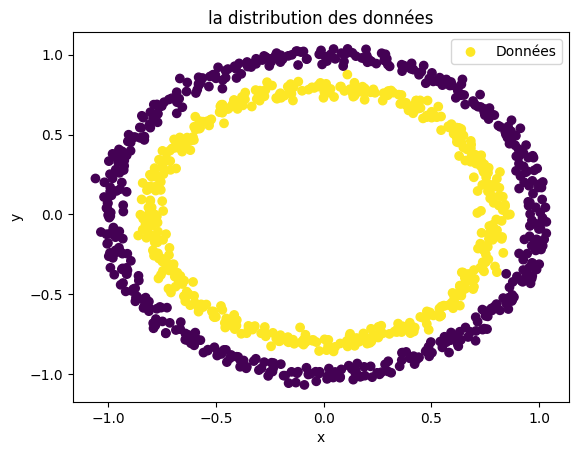

In [ ]:
from sklearn.datasets import make_circles
#l'ensemble de données généré est une matrice de points dans un espace à 2 dimensions. 
# Chaque ligne de cette matrice représente un point dans cet espace, et chaque point a 2 coordonnées : 
# une pour chaque dimension (X1 et X2).

samples = 1000
# ùale circles génère ces points dans un espace à 2 dimensions, organisés en cercles (deux classes en forme de cercles concentriques
x, y = make_circles(samples,#spécifie le nombre total de points.
                    noise = 0.03,
                    random_state = 42)#les résultats sont reproductibles.
# Afficher les résultats
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', label='Données')
#x[:, 0] : sélectionne la première colonne de x, c'est-à-dire les coordonnées X de tous les points.
#x[:, 1] : Cela sélectionne la deuxième colonne de x, c'est-à-dire les coordonnées Y de tous les points.
#c=y permet de colorier les points en fonction de leurs labels (c'est-à-dire y).
plt.xlabel('x')
plt.ylabel('y')
plt.title('la distribution des données')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.datasets import mnist

# Chargement du jeu de données MNIST

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Prétraitement des données : Normalisation et aplatissement des images
X_train = X_train / 255.0  # Normalisation des images
X_test = X_test / 255.0    # Normalisation des images
# Define the model with Dropout
model = Sequential()

x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)

# Ajout d'une couche dense avec 64 neurones, activation ReLU, et une entrée de taille 8
model.add(Dense(64, activation='relu'))
# Ajout d'une couche de sortie avec un seul neurone (pour une classification binaire)
model.add(Dense(1, activation='sigmoid'))
# Compilation du modèle
model.compile(optimizer=Adam(), 
              loss=BinaryCrossentropy(), 
              metrics=[Accuracy()])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Précision sur l'ensemble de test: {test_acc * 100:.2f}%")
#convertir la précision en pourcentage. 

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: -36900.1992 - accuracy: 0.1102 - val_loss: -108954.9297 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: -228466.9375 - accuracy: 0.1124 - val_loss: -378467.3438 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: -551662.5625 - accuracy: 0.1124 - val_loss: -765085.9375 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: -983847.0000 - accuracy: 0.1124 - val_loss: -1258981.2500 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: -1518748.5000 - accuracy: 0.1124 - val_loss: -1855032.8750 - val_accuracy: 0.1135
313/313 - 0s - loss: -1.8550e+06 - accuracy: 0.1135 - 377ms/epoch - 1ms/step
Précision sur l'ensemble de test: 11.35%


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: -41424.1484 - accuracy: 0.1124 - val_loss: -153245.4219 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: -449485.3125 - accuracy: 0.1124 - val_loss: -877459.4375 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: -1516932.8750 - accuracy: 0.1124 - val_loss: -2354536.2500 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: -3386995.7500 - accuracy: 0.1124 - val_loss: -4715936.5000 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: -6201493.0000 - accuracy: 0.1124 - val_loss: -8115526.0000 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: -10096564.0000 - accuracy: 0.1124 - val_loss: -12685849.0000 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] -

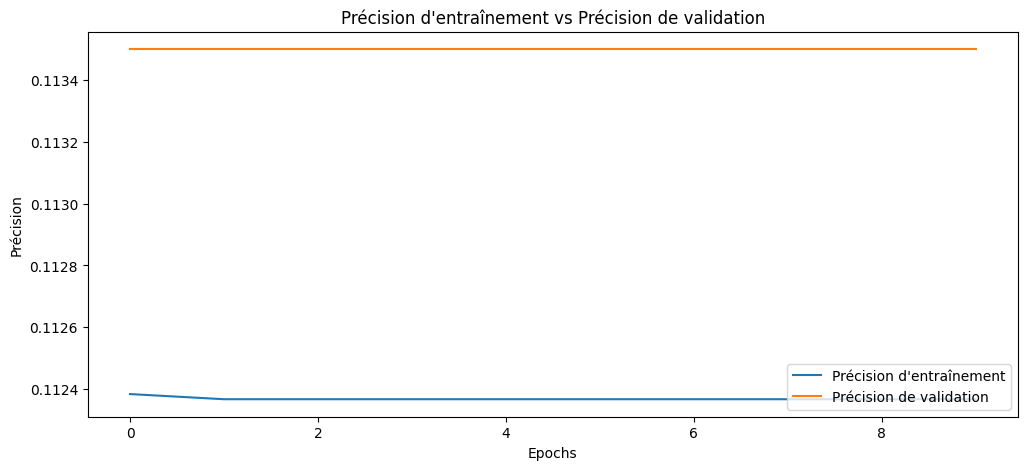

In [38]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
# Chargement du jeu de données MNIST

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraitement des données : Normalisation et aplatissement des images
X_train = X_train / 255.0  # Normalisation des images
X_test = X_test / 255.0    # Normalisation des images
# Define the model with Dropout

x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)

# Define a simple neural network model
model = Sequential([
        Dense(8, activation='relu', input_shape=(28 * 28,)),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Précision sur l'ensemble de test: {test_acc * 100:.2f}%")
#convertir la précision en pourcentage. 
# Tracer les courbes de perte et de précision
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Précision d\'entraînement vs Précision de validation')
plt.legend(loc='lower right')
plt.show()